Theoretical diffusivity = kBT/gamma = 1
Simulation diffusivity = <x(t)^2>/2t = 0.97


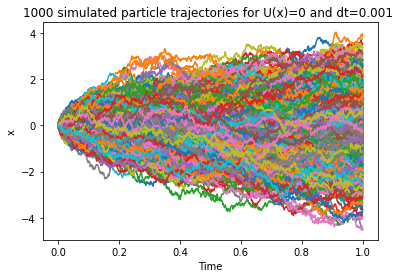

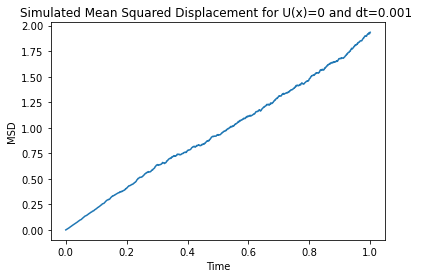

In [1]:
# Part (a)
import numpy as np
import matplotlib.pyplot as plt

dt = 1e-3   # step size
N = 1000  # number of steps
n = 1000    # number of simulations
t = np.linspace(0, N*dt, N)

noise = np.sqrt(2*dt)*np.random.normal(0, 1, size=(N,n))
xa = np.zeros(shape=(N,n),dtype='float32')  # set x(0)=0

for idx, _ in enumerate(t):
    if idx > 0:
        xa[idx, :] = xa[idx-1, :] + noise[idx-1, :]  

plt.plot(t,xa)
plt.xlabel('Time')
plt.ylabel('x')
plt.title(f'{n} simulated particle trajectories for U(x)=0 and dt={dt:.3f} ')

msd = np.mean(xa**2, axis=1)
plt.figure()
plt.plot(t,msd)
plt.xlabel('Time')
plt.ylabel('MSD')
plt.title(f'Simulated Mean Squared Displacement for U(x)=0 and dt={dt:.3f} ')
diffusivity = msd[1:] / (2*t[1:])
print('Theoretical diffusivity = kBT/gamma = 1')
print(f'Simulation diffusivity = <x(t)^2>/2t = {diffusivity.mean():.2f}')

The PDF is close to a normal distribution with
mean = 0.001
variance = 0.020


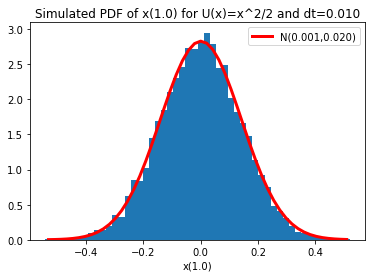

In [3]:
# Part (b)
from numpy import sqrt, pi, exp
from scipy.optimize import curve_fit

def normal(x, mu, sigma):
    return 1/sqrt(2*pi*sigma**2)*exp(-(x-mu)**2/(2*sigma**2))

dt = 1e-2    # step size
N = 1000000  # number of steps
n = 100      # number of steps in each partition
t = np.linspace(0, N*dt, N)

noise = np.sqrt(2*dt)*np.random.normal(0, 1, N)
xb = np.zeros(N,dtype='float32')

for idx, _ in enumerate(t):
    if idx > 0:
        xb[idx] = xb[idx-1] - xb[idx-1]*dt + noise[idx-1]  # Euler's method

xbr = xb.reshape((n,int(N/n)))
x = xbr[0,:]
xn = np.diff(x)
        
values, bins, _ = plt.hist(xn, 50, density=True)
bins = (bins[:-1] + bins[1:])/2
plt.xlabel(f'x({n*dt})')
plt.title(f'Simulated PDF of x({n*dt}) for U(x)=x^2/2 and dt={dt:.3f}')

mu0, sigma0 = 0, 1
[mu_fit, sigma_fit], _ = curve_fit(normal, bins, values, p0=[mu0, sigma0])

print('The PDF is close to a normal distribution with')
print(f'mean = {mu_fit:.3f}')
print(f'variance = {sigma_fit**2:.3f}')

plt.plot(bins, normal(bins, mu_fit, sigma_fit), linewidth=3, color='red', label=f'N({mu_fit:.3f},{sigma_fit**2:.3f})')
plt.legend()